 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [16]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [17]:
# Reading whale returns

whale_returns_path = Path("Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_returns_path,index_col='Date', parse_dates=True, infer_datetime_format=True)

In [18]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [19]:
# Drop nulls
whale_returns = whale_returns.dropna()

whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [20]:
# Reading algorithmic returns

algo_returns_path = Path("Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_path,index_col='Date', parse_dates=True, infer_datetime_format=True)

In [21]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [22]:
# Drop nulls
algo_returns = algo_returns.dropna()

algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [23]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")

sp500_history = pd.read_csv(sp500_history_path,index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_history.sort_index(inplace=True)

sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [24]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [25]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_history.dtypes

Close    float64
dtype: object

In [26]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [27]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [28]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['SP 500 Close']
sp500_daily_returns

,SP 500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
port_return = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
port_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

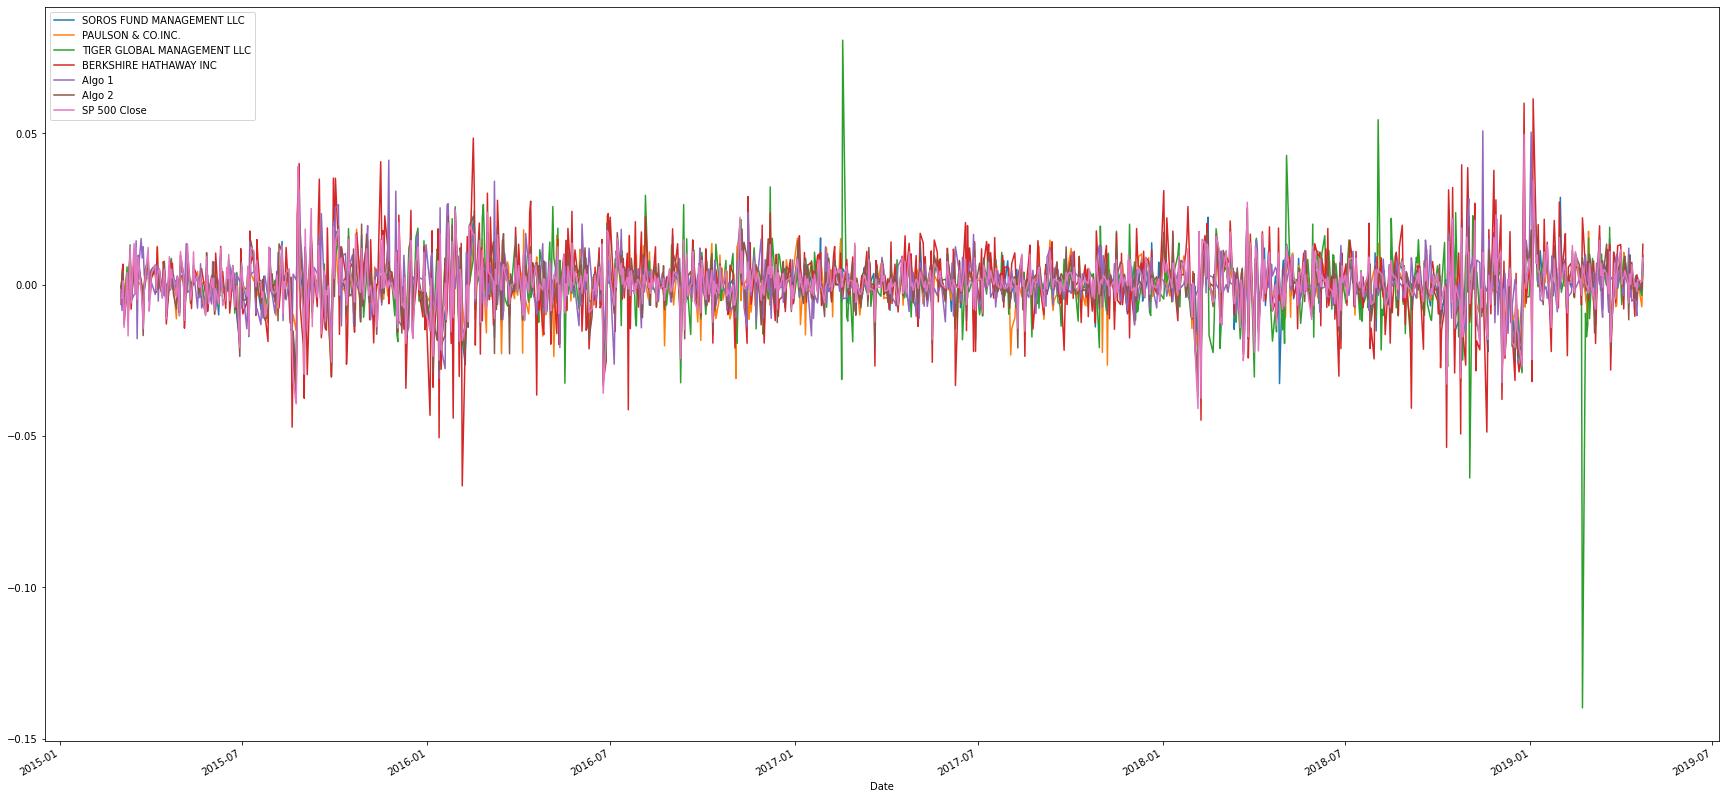

In [30]:
# Plot daily returns of all portfolios
port_return.plot(figsize=(30,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

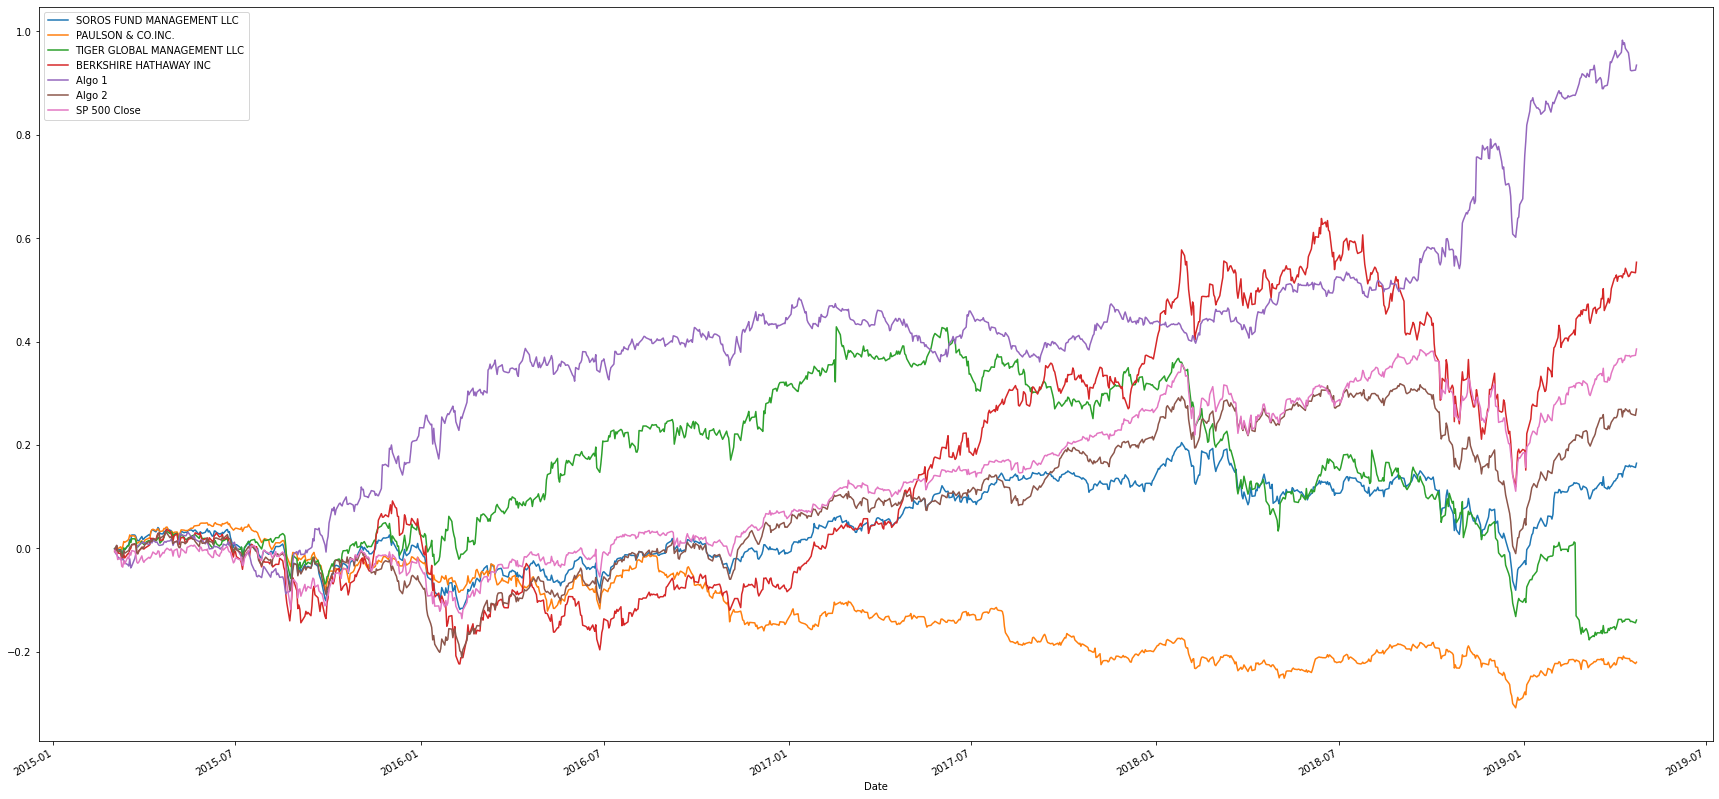

In [31]:
# Calculate cumulative returns of all portfolios
port_cumul_return = (1+port_return.sort_index()).cumprod()-1
# Plot cumulative returns
port_cumul_return.plot(figsize = (30,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

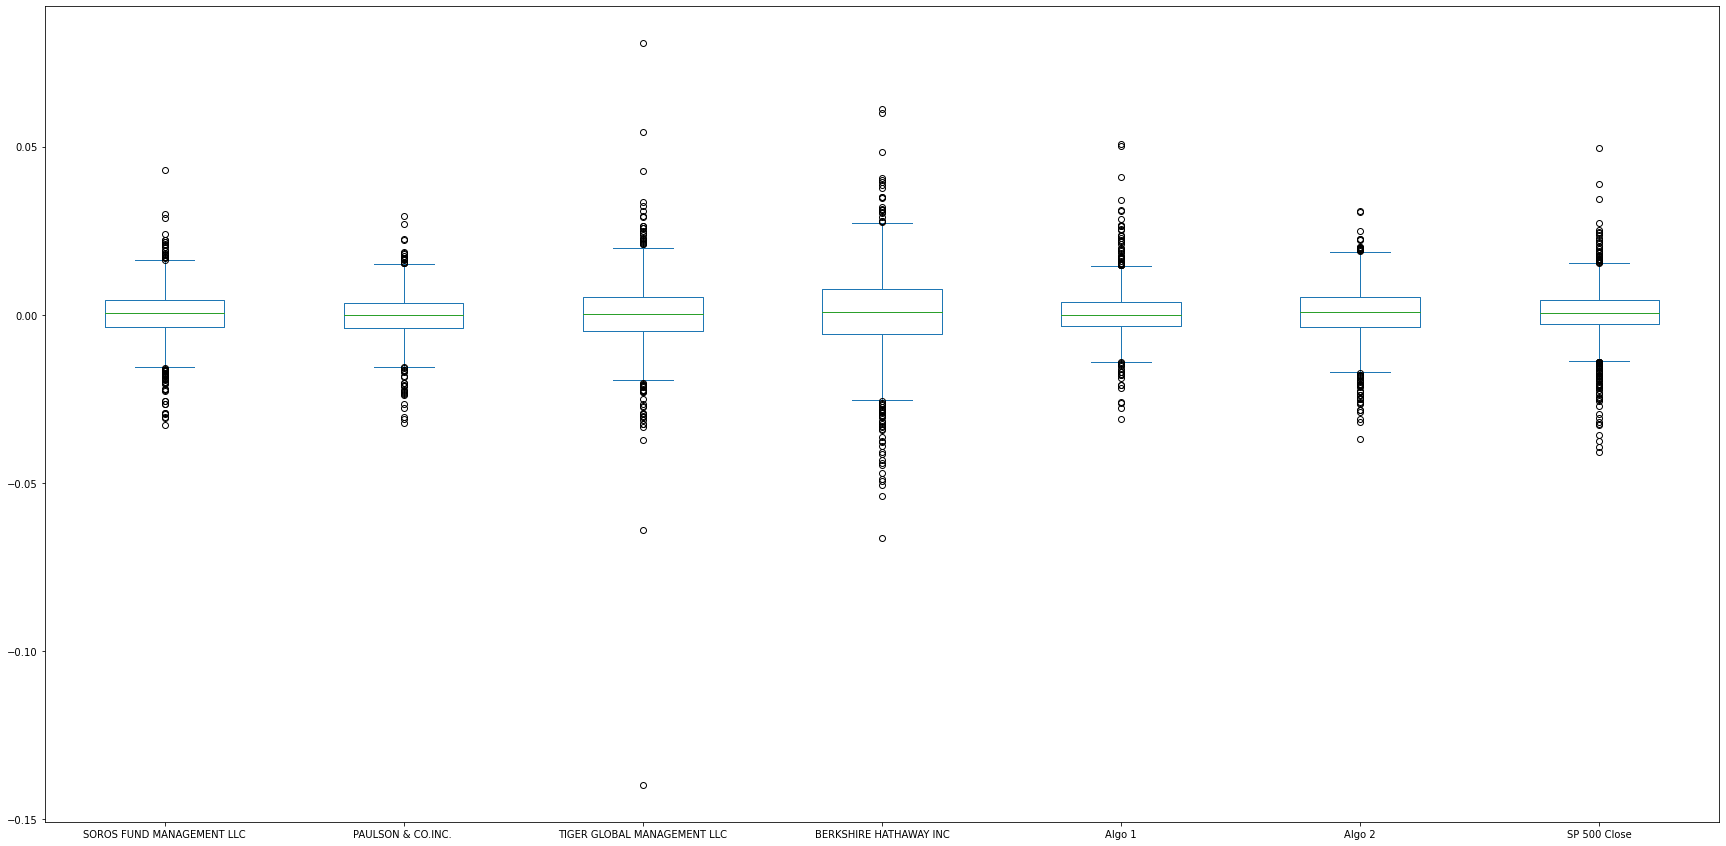

In [32]:
# Box plot to visually show risk
port_return.plot.box(figsize=(30,15))

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
port_return_std = port_return.std()

port_return_std.head(10)


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500 Close                   0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
print(f"Daily STD of SP500 = {port_return_std['SP 500 Close'].round(5)}")


# Determine which portfolios are riskier than the S&P 500
port_return_std[(port_return_std['SP 500 Close'] < port_return_std)]


Daily STD of SP500 = 0.00855


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
port_return_std_y = port_return_std * np.sqrt(252)

port_return_std_y 

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500 Close                   0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

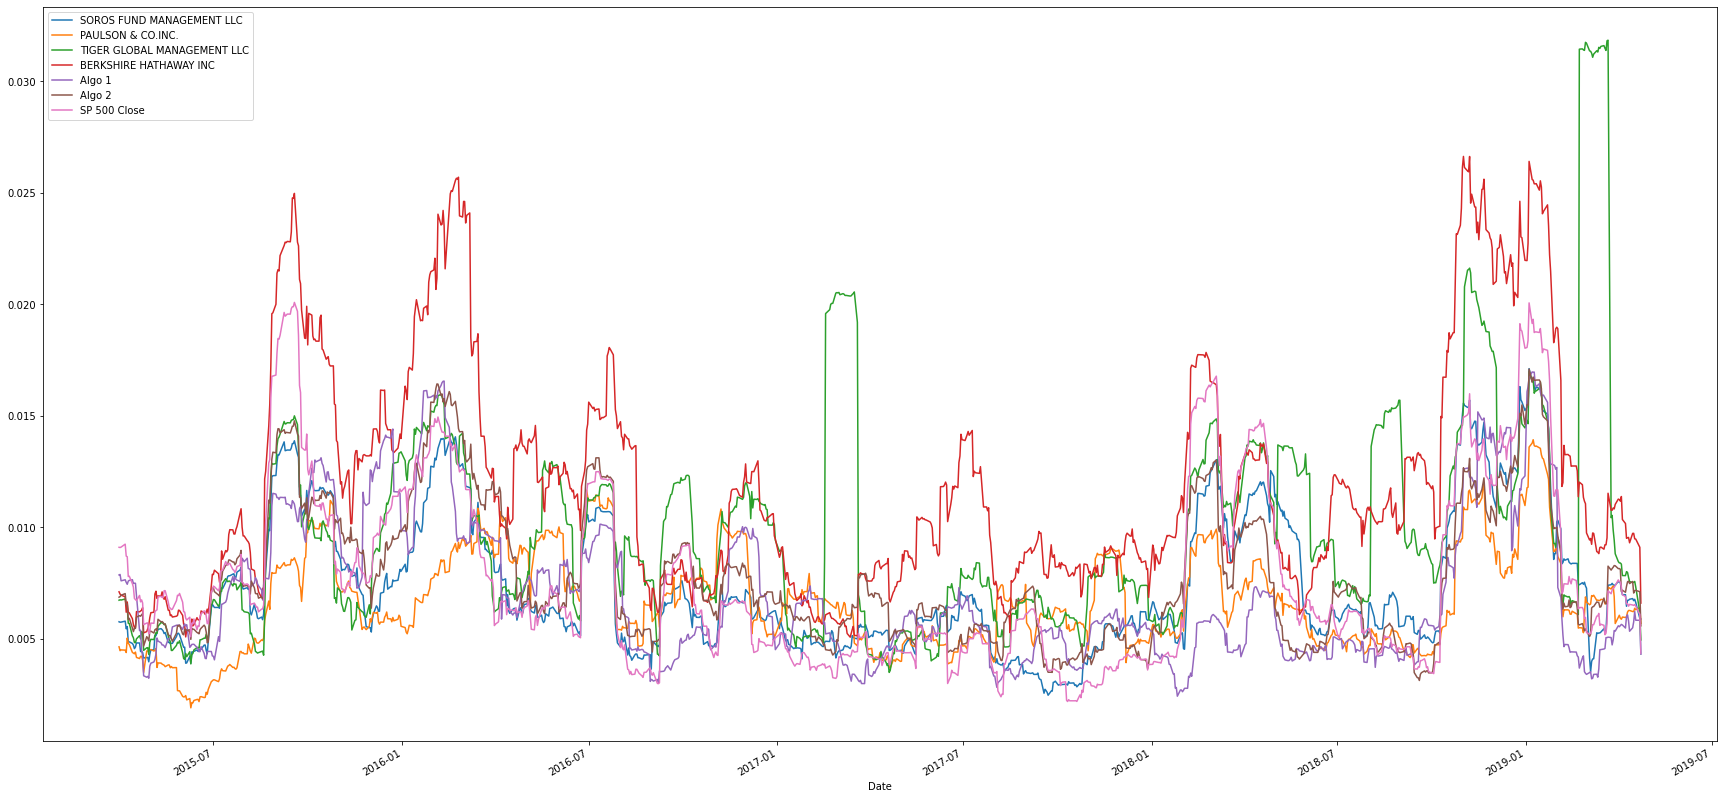

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_return_std_roll = port_return.rolling(window=21).std()
# Plot the rolling standard deviation
port_return_std_roll.plot(figsize=[30,15])

### Calculate and plot the correlation

<AxesSubplot:>

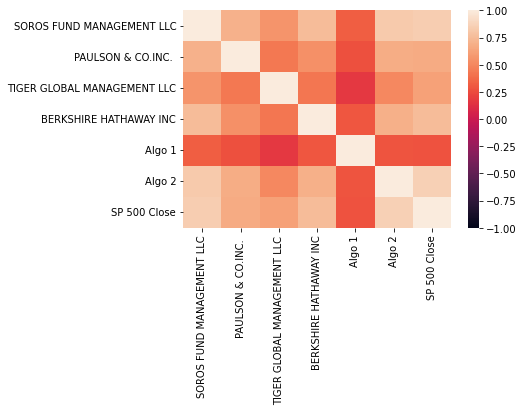

In [37]:
# Calculate the correlation

port_corr = port_return.corr()

# Display de correlation matrix

sns.heatmap(port_corr, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

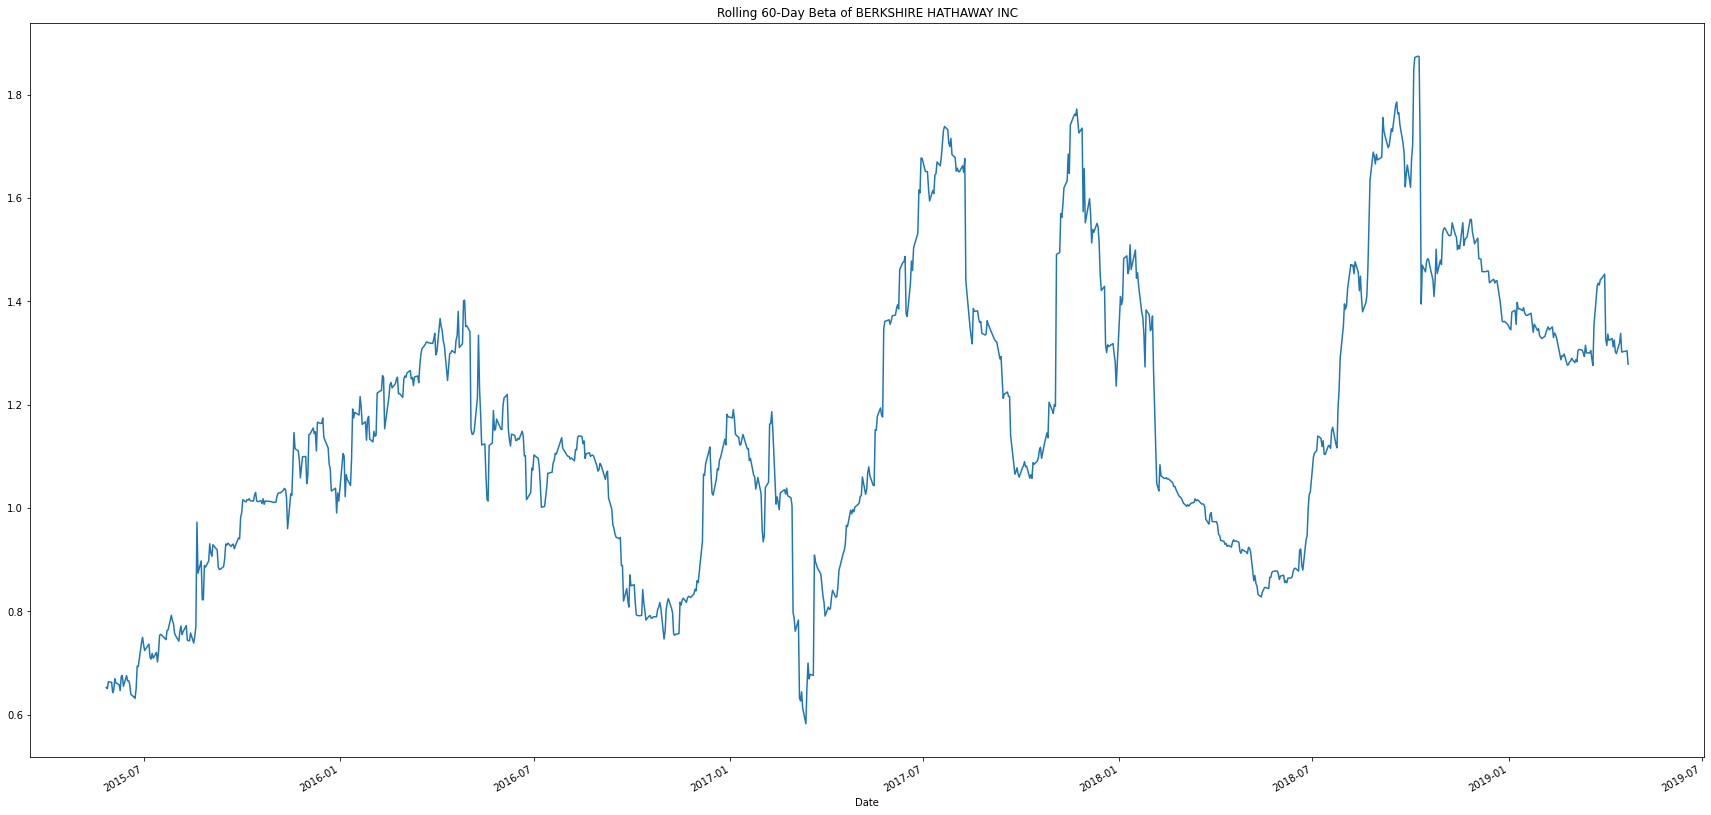

In [38]:
# Calculate covariance of a single portfolio

cov_bh = port_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(port_return['SP 500 Close'])

# Calculate variance of S&P 500

var_sp500 = port_return['SP 500 Close'].rolling(window=60).var()

# Computing beta

rol_beta = cov_bh/var_sp500

# Plot beta trend
rol_beta.plot(figsize=(30, 15), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [39]:
# Use `ewm` to calculate the rolling window

port_return_std_ema = port_return.ewm(halflife=21).std()

port_return_std_ema.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500 Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
sharpe = (port_return.mean() * 252) / (port_return.std() * np.sqrt(252))
sharpe.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

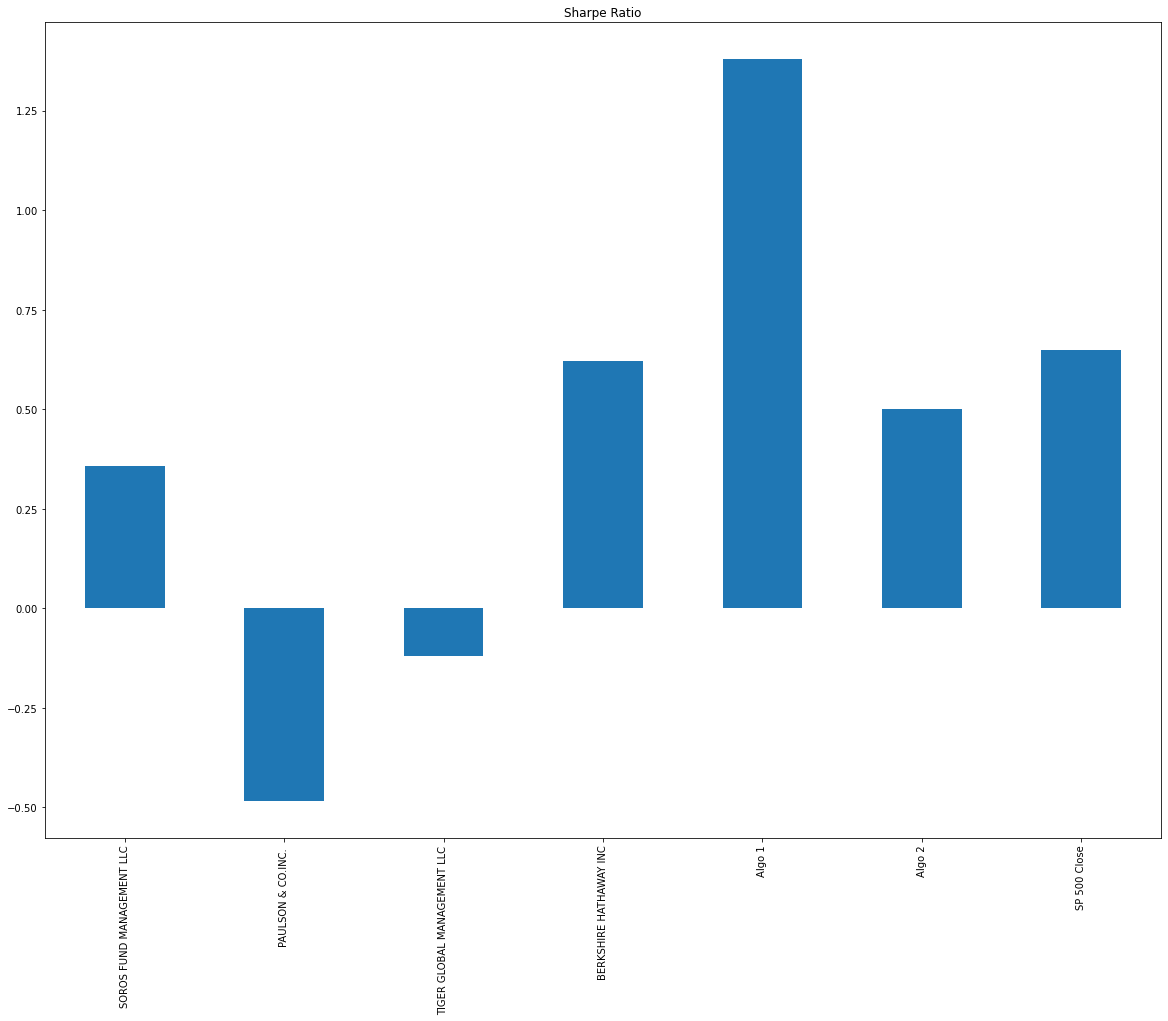

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar', title='Sharpe Ratio', figsize=(20,15))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Reading data from 1st stock
aapl_historical_path = Path("Resources/aapl_historical.csv")

aapl_historical = pd.read_csv(aapl_historical_path, index_col = "Trade DATE", parse_dates = True,infer_datetime_format = True)

aapl_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [43]:
# Reading data from 2nd stock
cost_historical_path = Path("Resources/cost_historical.csv")

cost_historical = pd.read_csv(cost_historical_path, index_col = "Trade DATE", parse_dates = True,infer_datetime_format = True)

cost_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [44]:
# Reading data from 3rd stock
goog_historical_path = Path("Resources/goog_historical.csv")

goog_historical = pd.read_csv(goog_historical_path, index_col = "Trade DATE", parse_dates = True,infer_datetime_format = True)

goog_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [45]:
# Combine all stocks in a single DataFrame
port_hist = pd.concat([aapl_historical, cost_historical, goog_historical], axis='rows', join='inner')
port_hist

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [46]:
# Reset Date index
port_hist = port_hist.reset_index()

port_hist

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [47]:
# Reorganize portfolio data by having a column per symbol
port_hist = port_hist.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
port_hist.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [48]:
# Calculate daily returns
port_hist_returns = port_hist.pct_change()
# Drop NAs
port_hist_returns.dropna(inplace = True)
# Display sample data
port_hist_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [59]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

port_hist_returns_weight = port_hist_returns.dot(weights)

cumulative_returns_weight = (1 + port_hist_returns_weight).cumprod()-1

In [60]:
# Display sample data
port_hist_returns_weight.sum()


0.14569723027355785

In [61]:
# Display sample data
cumulative_returns_weight.sum()


16.3150042358619

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame
port_return = pd.concat([port_hist_returns_weight, whale_returns, sp500_daily_returns, algo_returns], axis='columns', join='inner')
port_return.rename(columns={0:'CUSTOM PORTFOLIO' , 'SP 500 Close' : 'SP 500'},inplace=True)
port_return.head()

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500,Algo 1,Algo 2
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884,0.000915,0.001635
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.001135,-0.001139
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061,-0.002326,0.003341
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.006949,0.005205
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,0.002557,-0.002496


In [78]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
port_return.isnull().sum()
port_return.dropna(inplace = True)
port_return.head()

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500,Algo 1,Algo 2
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884,0.000915,0.001635
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.001135,-0.001139
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061,-0.002326,0.003341
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.006949,0.005205
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,0.002557,-0.002496


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [82]:
# Calculate the annualized `std`
port_return_std = port_return.std()
port_return_std_y = port_return.std() * np.sqrt(252)
port_return_std_y

CUSTOM PORTFOLIO               0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP 500                         0.152054
Algo 1                         0.133704
Algo 2                         0.139556
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

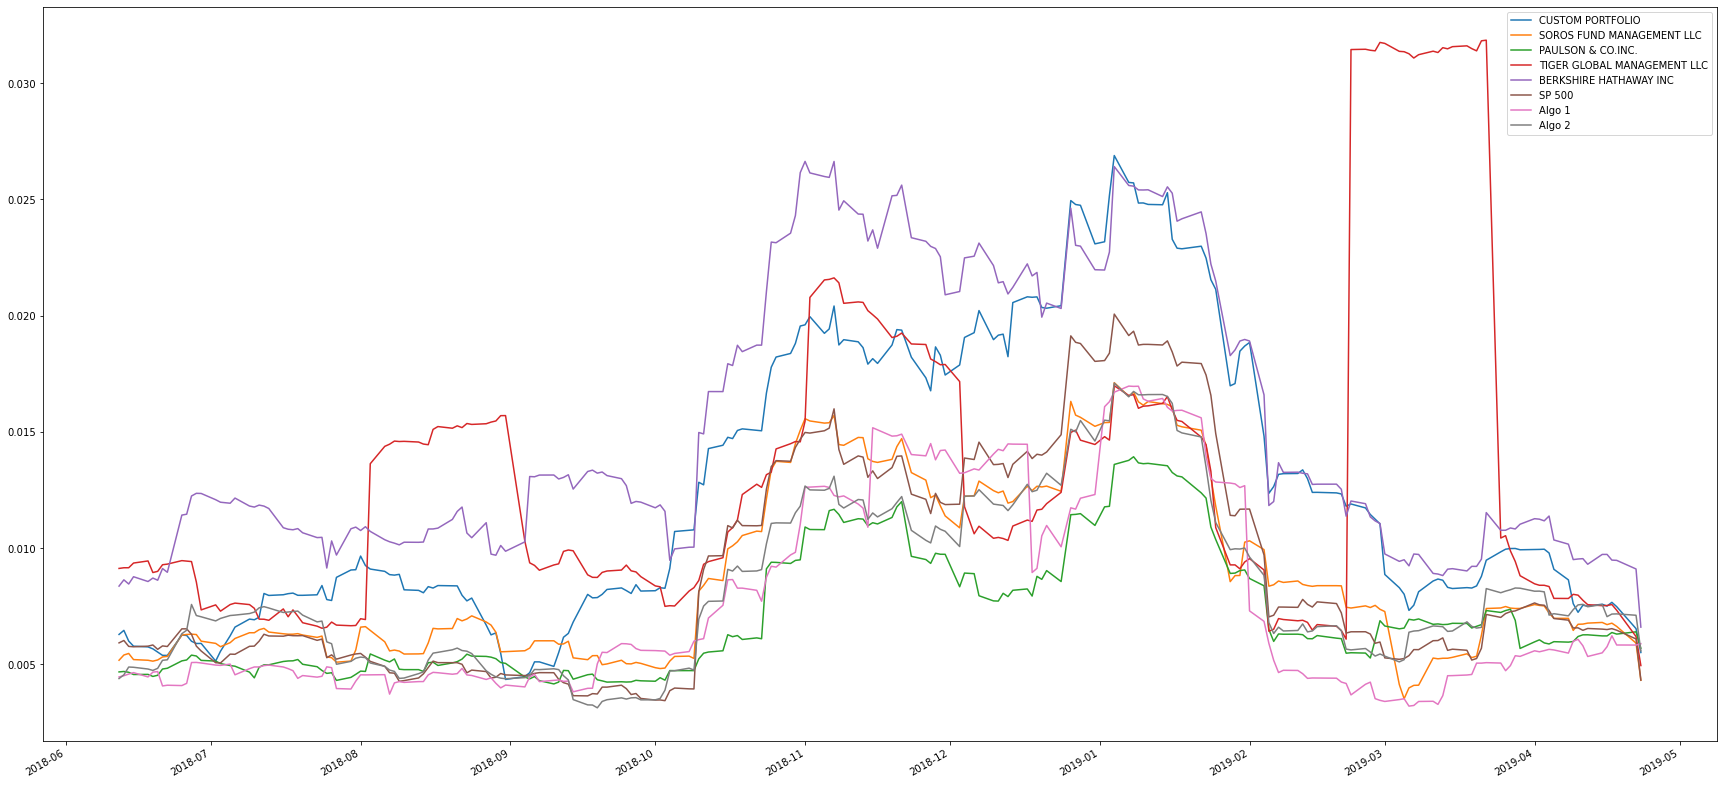

In [84]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_return_std_roll = port_return.rolling(window=21).std()
# Plot the rolling standard deviation
port_return_std_roll.plot(figsize=[30,15])

### Calculate and plot the correlation

<AxesSubplot:>

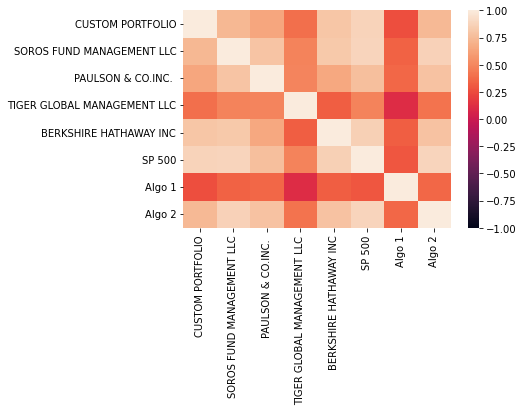

In [85]:
# Calculate and plot the correlation

port_corr = port_return.corr()

sns.heatmap(port_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of CUSTOM PORTFOLIO'}>

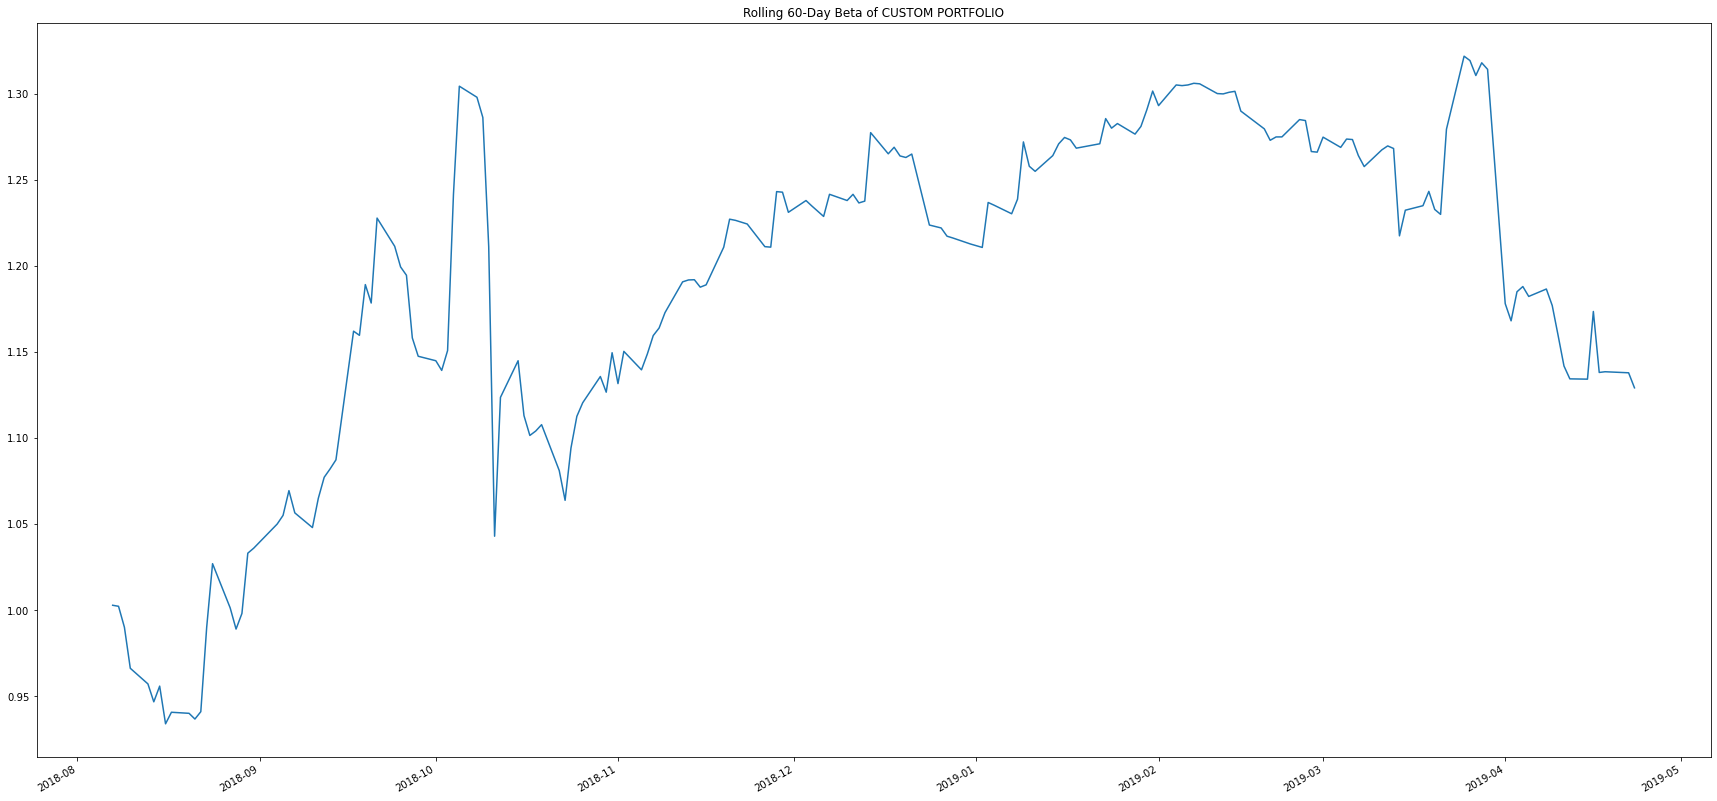

In [87]:
# Calculate and plot Beta

cov_cport = port_return['CUSTOM PORTFOLIO'].rolling(window=60).cov(port_return['SP 500'])

# Calculate variance of S&P 500

var_sp500 = port_return['SP 500'].rolling(window=60).var()

# Computing beta

rol_beta = cov_cport/var_sp500

# Plot beta trend
rol_beta.plot(figsize=(30, 15), title='Rolling 60-Day Beta of CUSTOM PORTFOLIO')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Calculate Annualized Sharpe Ratios
sharpe = (port_return.mean() * 252) / (port_return.std() * np.sqrt(252))
sharpe.head()

CUSTOM PORTFOLIO               0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

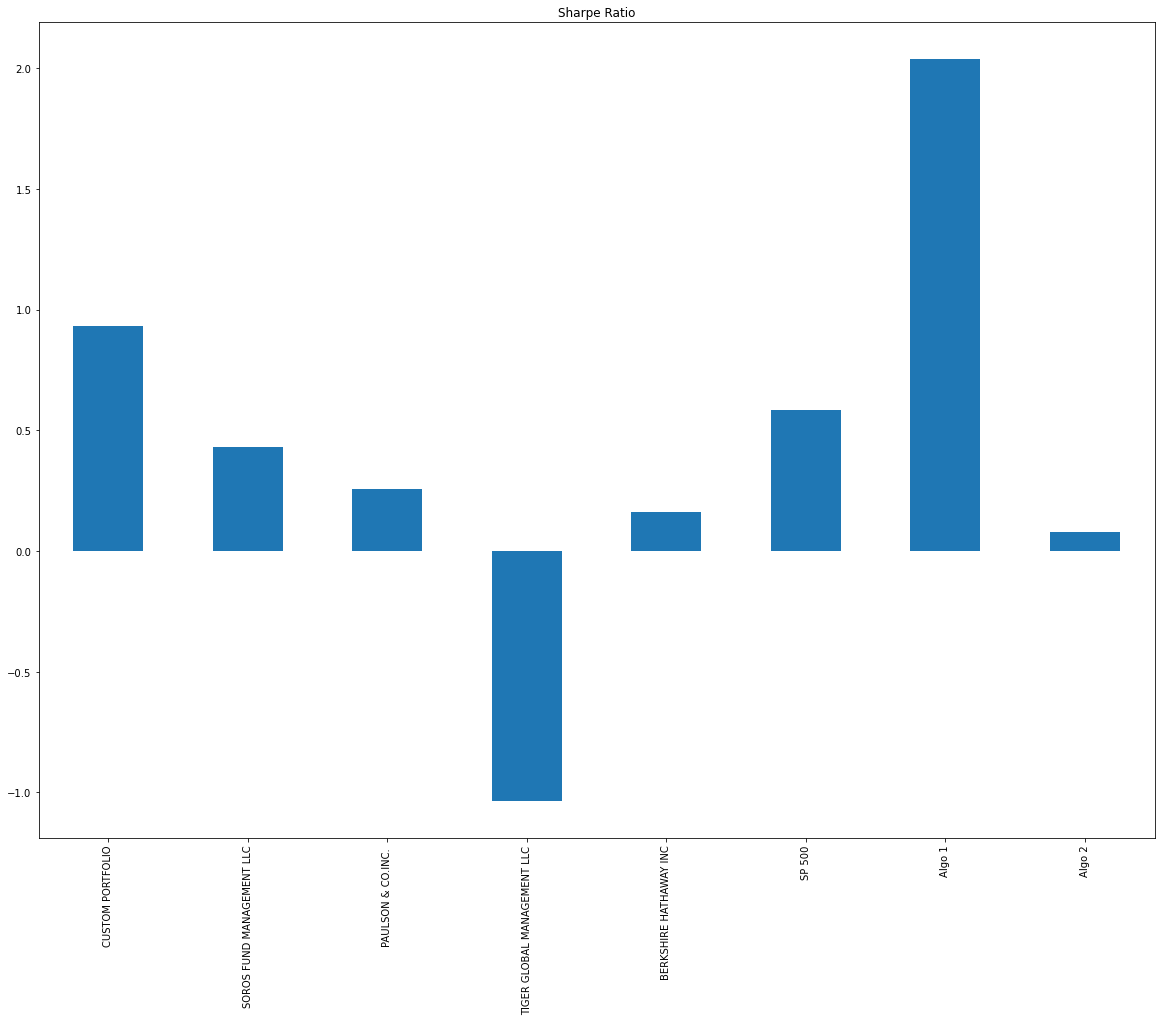

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar', title='Sharpe Ratio', figsize=(20,15))

### How does your portfolio do?

Write your answer here!

In [ ]:
The custom portfolio performed reasonably well yielding a relaitvely high cumulative return when compared to the other assets. It had a relatively high beta and sharpe ratio, which means that it had a strong correlation with the SP500 while still providing a decent return for the amount of risk.